<a href="https://colab.research.google.com/github/cleifton/Data_Science/blob/master/Alugueis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
# Dados fornecidos
data = {
    "Mês": [
        "2023-01", "2023-02", "2023-03", "2023-04", "2023-05", "2023-06", "2023-07", "2023-08", "2023-09", "2023-10", "2023-11", "2023-12",
        "2024-01", "2024-02", "2024-03", "2024-04", "2024-05", "2024-06", "2024-07", "2024-08", "2024-09"
    ],
    "Variação Mensal (%)": [
        2.43, 3.17, 3.89, 1.67, -0.16, 0.42, 2.00, 0.84, 1.18, -2.97, -1.70, -1.48,
        2.09, 2.46, 2.35, 0.96, -0.19, -0.03, 0.24, 0.70, 0.87
    ],
    "Variação 12 Meses (%)": [
        21.16, 25.84, 28.21, 28.83, 25.11, 24.57, 25.46, 23.21, 19.24, 12.80, 9.17, 9.45,
        9.09, 8.34, 6.74, 5.99, 5.96, 5.49, 3.67, 3.52, 3.20
    ]
}

In [4]:
# Organizando os dados em DataFrame
df = pd.DataFrame(data)
df['Mês'] = pd.to_datetime(df['Mês'])

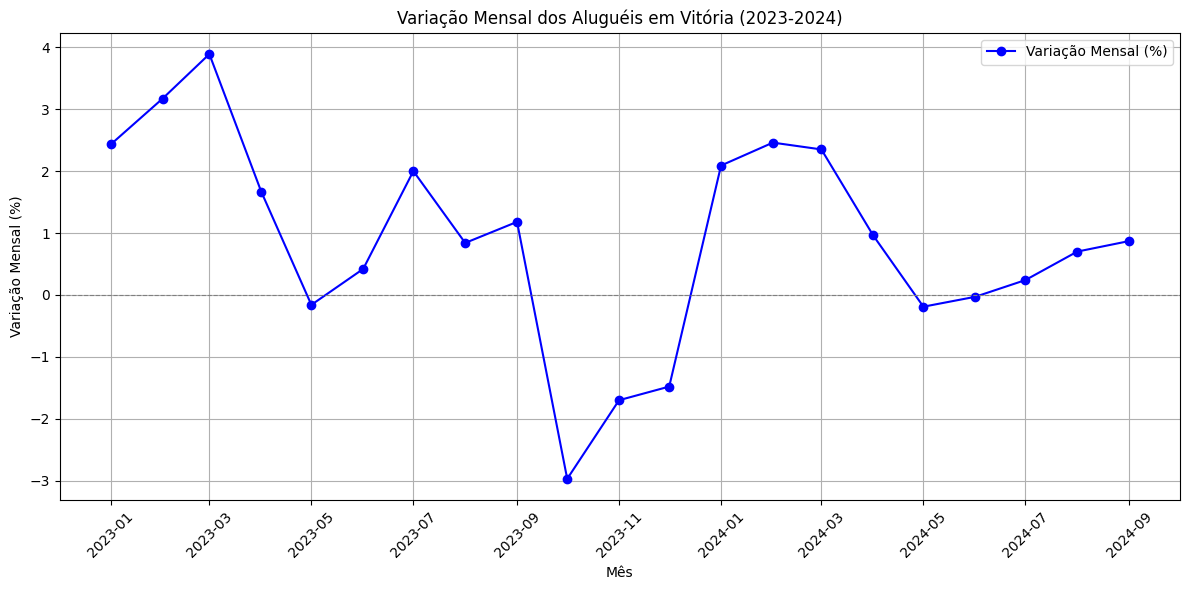

In [5]:
# Gráfico de Variação Mensal
plt.figure(figsize=(12, 6))
plt.plot(df['Mês'], df['Variação Mensal (%)'], marker='o', label='Variação Mensal (%)', color='blue')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Variação Mensal dos Aluguéis em Vitória (2023-2024)')
plt.xlabel('Mês')
plt.ylabel('Variação Mensal (%)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

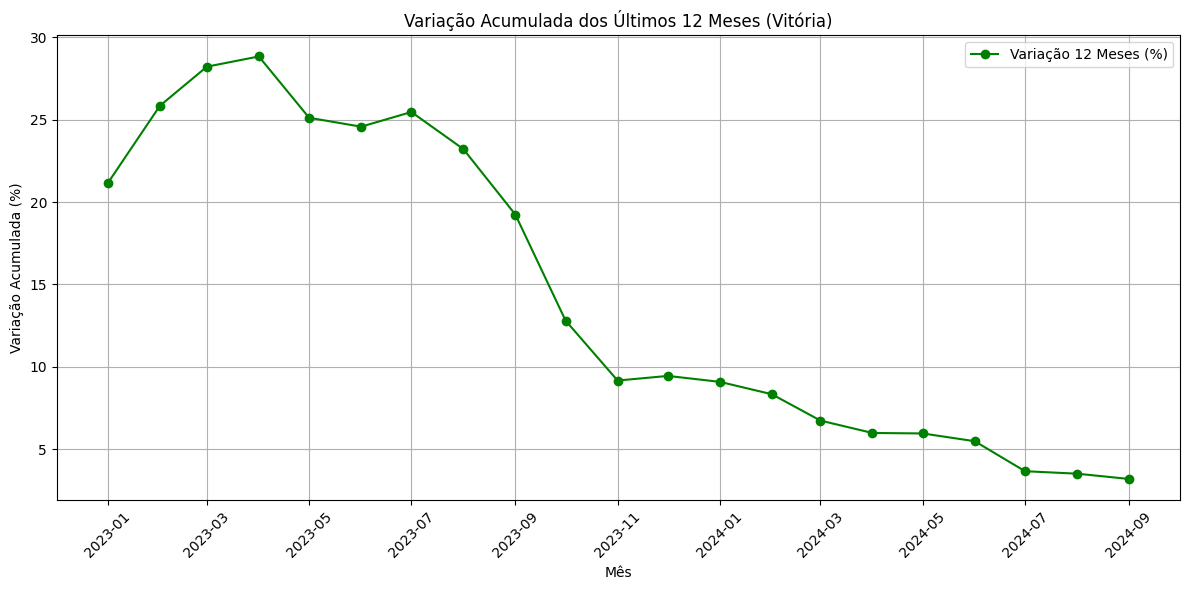

In [6]:
# Gráfico de Variação Acumulada (12 meses)
plt.figure(figsize=(12, 6))
plt.plot(df['Mês'], df['Variação 12 Meses (%)'], marker='o', label='Variação 12 Meses (%)', color='green')
plt.title('Variação Acumulada dos Últimos 12 Meses (Vitória)')
plt.xlabel('Mês')
plt.ylabel('Variação Acumulada (%)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
historical_data = df['Variação Mensal (%)'].values
model = ExponentialSmoothing(historical_data, trend='add', seasonal=None)
model_fit = model.fit()


In [11]:

# Criando projeção
projection = model_fit.forecast(steps=6)
future_months = pd.date_range(df['Mês'].iloc[-1] + pd.DateOffset(months=1), periods=6, freq='M')

<ipython-input-11-0b77b466264d>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(df['Mês'].iloc[-1] + pd.DateOffset(months=1), periods=6, freq='M')


In [12]:
# Adicionando a projeção ao DataFrame
projection_df = pd.DataFrame({
    'Mês': future_months,
    'Variação Mensal (%)': projection,
    'Variação 12 Meses (%)': [np.nan] * 6
})

df = pd.concat([df, projection_df], ignore_index=True)

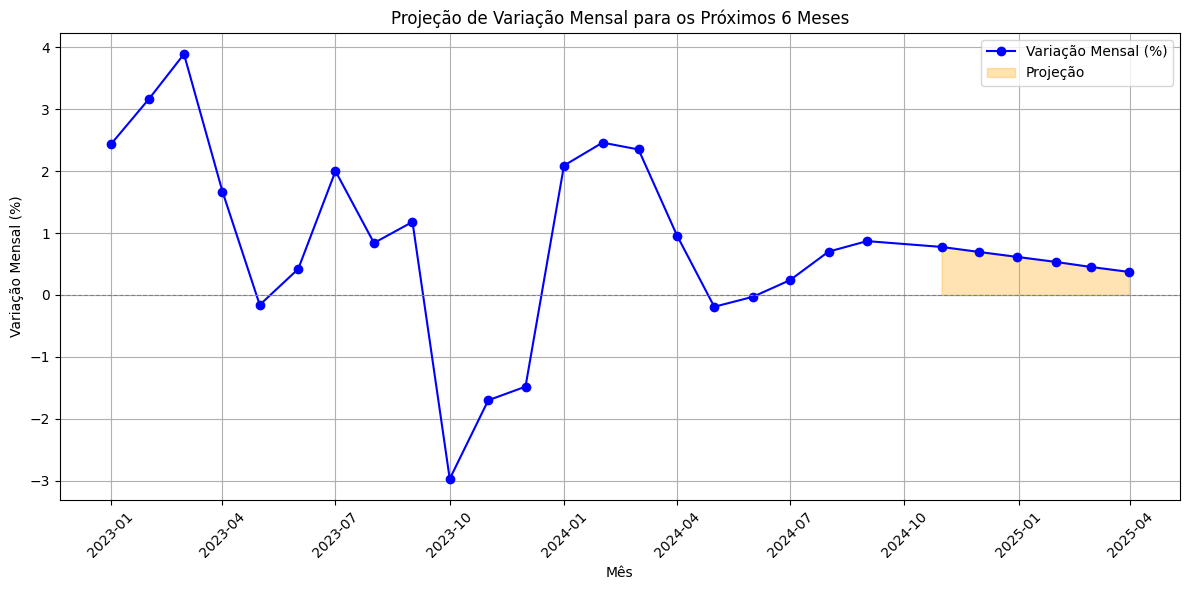

In [13]:
# Gráfico com Projeção
plt.figure(figsize=(12, 6))
plt.plot(df['Mês'], df['Variação Mensal (%)'], marker='o', label='Variação Mensal (%)', color='blue')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.fill_between(projection_df['Mês'], projection_df['Variação Mensal (%)'], color='orange', alpha=0.3, label='Projeção')
plt.title('Projeção de Variação Mensal para os Próximos 6 Meses')
plt.xlabel('Mês')
plt.ylabel('Variação Mensal (%)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()